# PART Express On-time Performance Analysis
## Spring 2021 Season
### February 1, 2021 - April 30, 2021

The following analysis was conducted using Automatic Passenger Count (APC) data from the PART Express system. On-time is defined as between 1 minute early and 5.5 minutes late. 

In [25]:
# import libraries
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import calplot
import matplotlib.pyplot as plt
from IPython.display import Image

pd.options.display.max_columns = 999

In [3]:
# define parameters
path = 'W:\!PART Express Data\APC Reports\On-Time Performance Report\OnTimePerformance_2021-02-01_2021-04-30(Spring2021).xlsx'
sheet = 'All Time Points'
engine = 'openpyxl'

# read in data
df = pd.read_excel(io=path, sheet_name=sheet, engine=engine)

# preview dataframe
df.head()

,DAYOFWK,ROUTE,BLOCK_NUM,DIR,TRIP_TIME,DATE,SERVICE_PERIOD,TP_NUM,TIMEPNT,ARRIVAL_TIME,DEPARTURE_TIME,DWDP_TIME,SCHEDULE_TIME,SCH_DEV,STATUS,LONGNAME
0,WKDY,6,601,Dir = 0,05:30:00,2021-02-01,AM Peak,0,Mt Airy Park & Ride,05:26:26,05:26:26,05:26:26,05:30:00,-3.57,Early,6 - Surry County Express
1,WKDY,6,601,Dir = 0,05:30:00,2021-02-02,AM Peak,0,Mt Airy Park & Ride,05:23:02,05:24:25,05:30:26,05:30:00,0.43,On Time,6 - Surry County Express
2,WKDY,6,601,Dir = 0,05:30:00,2021-02-03,AM Peak,0,Mt Airy Park & Ride,05:25:27,05:26:41,05:32:01,05:30:00,2.02,On Time,6 - Surry County Express
3,WKDY,6,601,Dir = 0,05:30:00,2021-02-04,AM Peak,0,Mt Airy Park & Ride,05:23:08,05:23:08,05:23:08,05:30:00,-6.87,Early,6 - Surry County Express
4,WKDY,6,601,Dir = 0,05:30:00,2021-02-05,AM Peak,0,Mt Airy Park & Ride,05:31:01,05:31:53,05:32:21,05:30:00,2.35,On Time,6 - Surry County Express


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49721 entries, 0 to 49720
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DAYOFWK         49721 non-null  object        
 1   ROUTE           49721 non-null  int64         
 2   BLOCK_NUM       49721 non-null  int64         
 3   DIR             49721 non-null  object        
 4   TRIP_TIME       49721 non-null  object        
 5   DATE            49721 non-null  datetime64[ns]
 6   SERVICE_PERIOD  49721 non-null  object        
 7   TP_NUM          49721 non-null  int64         
 8   TIMEPNT         49721 non-null  object        
 9   ARRIVAL_TIME    49721 non-null  object        
 10  DEPARTURE_TIME  49721 non-null  object        
 11  DWDP_TIME       49721 non-null  object        
 12  SCHEDULE_TIME   49721 non-null  object        
 13  SCH_DEV         49721 non-null  float64       
 14  STATUS          49721 non-null  object        
 15  LO

### Data cleaning

In [5]:
# create new attributes
df['Day of Week'] = df['DATE'].dt.day_name()
df['Month'] = df['DATE'].dt.month

# convert attributes to categories
df['DAYOFWK'] = df['DAYOFWK'].astype('category')
df['ROUTE'] = df['ROUTE'].astype('category')
df['DIR'] = df['DIR'].astype('category')
df['SERVICE_PERIOD'] = df['SERVICE_PERIOD'].astype('category')
df['TIMEPNT'] = df['TIMEPNT'].astype('category')
df['Day of Week'] = df['Day of Week'].astype('category')
df['Month'] = df['Month'].astype('category')

# check dataframe size
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49721 entries, 0 to 49720
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DAYOFWK         49721 non-null  category      
 1   ROUTE           49721 non-null  category      
 2   BLOCK_NUM       49721 non-null  int64         
 3   DIR             49721 non-null  category      
 4   TRIP_TIME       49721 non-null  object        
 5   DATE            49721 non-null  datetime64[ns]
 6   SERVICE_PERIOD  49721 non-null  category      
 7   TP_NUM          49721 non-null  int64         
 8   TIMEPNT         49721 non-null  category      
 9   ARRIVAL_TIME    49721 non-null  object        
 10  DEPARTURE_TIME  49721 non-null  object        
 11  DWDP_TIME       49721 non-null  object        
 12  SCHEDULE_TIME   49721 non-null  object        
 13  SCH_DEV         49721 non-null  float64       
 14  STATUS          49721 non-null  object        
 15  LO

In [6]:
# rename attributes
df.rename(columns={
    'DAYOFWK': 'Day Type',
    'BLOCK_NUM': 'Block ID',
    'DIR': 'Direction',
    'TRIP_TIME': 'Trip Start Time',
    'DATE': 'Date',
    'SERVICE_PERIOD': 'Service Period',
    'TP_NUM': 'Time Point Number',
    'TIMEPNT': 'Stop Name',
    'ARRIVAL_TIME': 'Arrival Time',
    'DEPARTURE_TIME': 'Departure Time',
    'SCHEDULE_TIME': 'Scheduled Time',
    'SCH_DEV': 'Schedule Deviation',
    'STATUS': 'Status',
    'LONGNAME': 'Route'
}, inplace=True)

# drop columns
df.drop(['ROUTE', 'DWDP_TIME'], axis=1, inplace=True)

# preview modified data set
df.head()

,Day Type,Block ID,Direction,Trip Start Time,Date,Service Period,Time Point Number,Stop Name,Arrival Time,Departure Time,Scheduled Time,Schedule Deviation,Status,Route,Day of Week,Month
0,WKDY,601,Dir = 0,05:30:00,2021-02-01,AM Peak,0,Mt Airy Park & Ride,05:26:26,05:26:26,05:30:00,-3.57,Early,6 - Surry County Express,Monday,2
1,WKDY,601,Dir = 0,05:30:00,2021-02-02,AM Peak,0,Mt Airy Park & Ride,05:23:02,05:24:25,05:30:00,0.43,On Time,6 - Surry County Express,Tuesday,2
2,WKDY,601,Dir = 0,05:30:00,2021-02-03,AM Peak,0,Mt Airy Park & Ride,05:25:27,05:26:41,05:30:00,2.02,On Time,6 - Surry County Express,Wednesday,2
3,WKDY,601,Dir = 0,05:30:00,2021-02-04,AM Peak,0,Mt Airy Park & Ride,05:23:08,05:23:08,05:30:00,-6.87,Early,6 - Surry County Express,Thursday,2
4,WKDY,601,Dir = 0,05:30:00,2021-02-05,AM Peak,0,Mt Airy Park & Ride,05:31:01,05:31:53,05:30:00,2.35,On Time,6 - Surry County Express,Friday,2


### Exploratory Data Analysis

Now that the data is clean, let's dig in and see what we can find out...

In [7]:
len_of_df = len(df)

by_route = df.groupby('Route').size().sort_values(ascending=False).to_frame()
by_route.rename(columns={0: 'Count'}, inplace=True)
by_route['Percentage'] = by_route['Count'] / len_of_df
by_route.style.format({'Count': '{:,}', 'Percentage': '{:.2%}'})

,Count,Percentage
Route,,
17 - Kernersville Express,"8,045",16.18%
2 - Greensboro Express,"5,741",11.55%
1 - Winston-Salem Express,"5,439",10.94%
3 - High Point Express,"5,328",10.72%
10 - Randolph Express,"4,607",9.27%
9 - Davidson Business 85 Express,"3,709",7.46%
24 - Burgess/Regional Rd,"3,411",6.86%
4 - Alamance-Burlington Express,"3,139",6.31%
20 - NW Pleasant Ridge,"2,928",5.89%


In [8]:
by_route.loc[[
    '1 - Winston-Salem Express', '2 - Greensboro Express', '3 - High Point Express'
]].style.format({'Count': '{:,}', 'Percentage': '{:.2%}'})

,Count,Percentage
Route,,
1 - Winston-Salem Express,"5,439",10.94%
2 - Greensboro Express,"5,741",11.55%
3 - High Point Express,"5,328",10.72%


The results appear to show that some routes are not being sampled as often as others. For example, Route 22 only has 801 observations in the data set while the other shuttle routes (20, 21, 23, 24) have around 2,500 records. The second data frame isolates the urban express routes (1, 2, 3) and they all have a similar number of observations. This is more in line with expectations as the operate the same number of trips.

In [9]:
df['Schedule Deviation'].describe()[['mean', 'std', 'min', 'max']]

mean     1.370734
std      3.093284
min     -9.980000
max     19.880000
Name: Schedule Deviation, dtype: float64

Looking at the overall system, the average deviation from the scheduled time is 1.37 minutes with a standard deviation of 3.09 minutes. The earliest a vehicle left was nearly 10 minutes early and the latest a vehicle arrived was almost 20 minutes late. It should be stated that vehicles arriving later than 20 minutes have been removed from the data on UTA's side. This is some logic that they utilize. Let's check out the minimum and maximum records...

In [10]:
# identify the stop with the latest departure
df.iloc[df['Schedule Deviation'].idxmax()].to_frame()

,37518
Day Type,WKDY
Block ID,4005
Direction,Dir = 0
Trip Start Time,17:05:00
Date,2021-04-12 00:00:00
Service Period,PM Peak
Time Point Number,3
Stop Name,N Columbia at W Franklin St
Arrival Time,17:46:53
Departure Time,17:46:53


The record with the largest schedule deviation is on Route 4 at N Columbia and W Franklin in Chapel Hill. Let's dig into this a little bit...

In [17]:
df[
    (df['Block ID'] == 4005) &
    (df['Direction'] == 'Dir = 0') &
    (df['Date'] == '2021-04-12') &
    (df['Service Period'] == 'PM Peak')
].sort_values(by='Arrival Time')

,Day Type,Block ID,Direction,Trip Start Time,Date,Service Period,Time Point Number,Stop Name,Arrival Time,Departure Time,Scheduled Time,Schedule Deviation,Status,Route,Day of Week,Month
37505,WKDY,4005,Dir = 0,17:05:00,2021-04-12,PM Peak,0,Mebane Cone Health Park & Ride,17:19:41,17:21:27,17:05:00,16.75,Late,4 - Alamance-Burlington Express,Monday,4
37518,WKDY,4005,Dir = 0,17:05:00,2021-04-12,PM Peak,3,N Columbia at W Franklin St,17:46:53,17:46:53,17:27:00,19.88,Late,4 - Alamance-Burlington Express,Monday,4


It appears that the trip started almost 17 minutes late leaving Mebane Cone Health. Let's take a look at the trip before and see if we can see where the bus got off schedule...

In [19]:
df[
    (df['Block ID'] == 4005) &
    (df['Direction'] == 'Dir = 1') &
    (df['Date'] == '2021-04-12') &
    (pd.to_datetime(df['Trip Start Time'], format='%H:%M:%S') == pd.to_datetime('16:15:00', format='%H:%M:%S'))
].sort_values(by='Arrival Time')

,Day Type,Block ID,Direction,Trip Start Time,Date,Service Period,Time Point Number,Stop Name,Arrival Time,Departure Time,Scheduled Time,Schedule Deviation,Status,Route,Day of Week,Month
33088,WKDY,4005,Dir = 1,16:15:00,2021-04-12,PM Peak,0,Ambulatory Care Center,16:11:17,16:16:12,16:15:00,1.67,On Time,4 - Alamance-Burlington Express,Monday,4
33101,WKDY,4005,Dir = 1,16:15:00,2021-04-12,PM Peak,1,UNC Hospitals at Manning Dr,16:18:34,16:18:34,16:20:00,-1.23,Early,4 - Alamance-Burlington Express,Monday,4
33114,WKDY,4005,Dir = 1,16:15:00,2021-04-12,PM Peak,4,Columbia at Rosemary,16:24:36,16:24:36,16:27:00,-2.40,Early,4 - Alamance-Burlington Express,Monday,4


The 4:15 PM westbound trip on Route 4 seems to have departed from Chapel Hill on time and went through some of the time points slightly early. Let's consult the TransLoc Instant Replay function to confirm that the bus was late leaving Mebane Cone Health on the 5:05 PM trip.

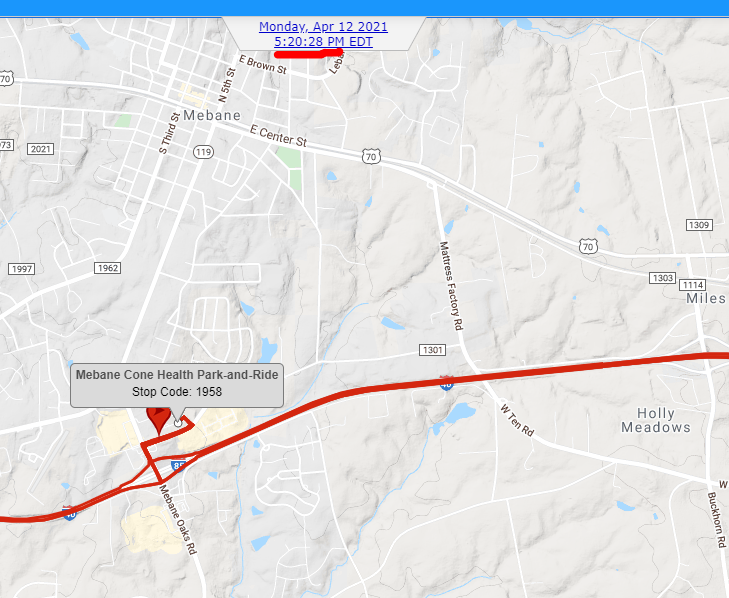

In [24]:
Image(filename='route4_20210412_1705.png',width=800, height=600)

The screenshot from TransLoc above shows Route 4 arriving late. There was a back-up on the westbound direction of I-40 causing Route 4 to fall behind schedule.

Now let's find out which trip was 10 minutes ahead of schedule.

In [26]:
# identify the stop with the earliest departure
df.iloc[df['Schedule Deviation'].idxmin()].to_frame()

,25361
Day Type,WKDY
Block ID,2402
Direction,Dir = 0
Trip Start Time,13:45:00
Date,2021-03-17 00:00:00
Service Period,Off Peak
Time Point Number,0
Stop Name,Coble Transportation Center
Arrival Time,13:32:27
Departure Time,13:34:14


It seems that on March 17, Route 24 pulled out of the CTC nearly 10 minutes early. We will again consult TransLoc's Instant Replay feature.

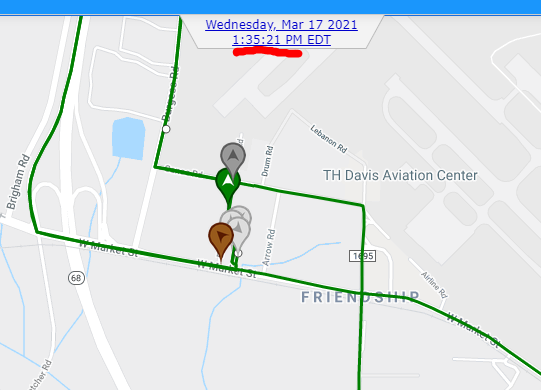

In [27]:
Image(filename='shuttles_20210317_1345.png',width=800, height=600)

Looking at TransLoc we can see some interesting behaviors. For example, it is 1:35 PM and Routes 20/21, 22/23 and 24 all just pull out of the CTC and circle the block using Arrow Rd. This movement is likely throwing off the APC system.

Now that we've examined the two extremes of the data set, let's take a look at the performance overall.

In [28]:
otp_performance = df.groupby('Status').size().sort_values().to_frame()
otp_performance.rename(columns={0: 'Count'}, inplace=True)
otp_performance['Percentage'] = otp_performance['Count'] / len_of_df
otp_performance.style.format({'Count': '{:,}', 'Percentage': '{:.2%}'})

,Count,Percentage
Status,,
Late,"4,456",8.96%
Early,"7,692",15.47%
On Time,"37,573",75.57%


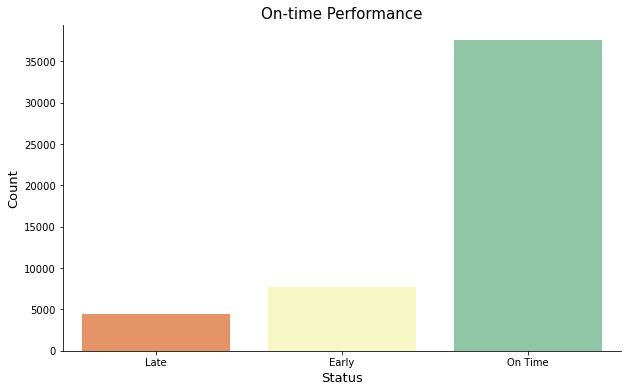

In [29]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=otp_performance.index, y='Count', data=otp_performance, palette='Spectral')
plt.xlabel('Status',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.title('On-time Performance', fontsize=15)
sns.despine()
plt.show()

Looking at the entire data set, we can see that the majority of records are on-time. This represents about 76% on-time performance. There appears to be more trips that leave early than are late. Let's examine how late or early PART Express vehicles are.

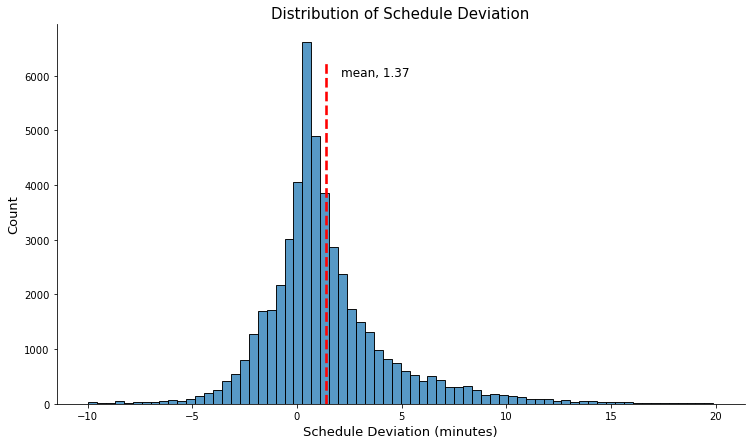

In [31]:
mean = round(df['Schedule Deviation'].mean(), 2)

# create histogram for schedule deviation
ax = sns.displot(df, x='Schedule Deviation', bins=70, height=6, aspect=1.75)
plt.axvline(mean, 0, 0.9, color='red', ls='--', lw=2.6)
plt.text(2.12, 6000, 'mean, ' + str(mean), size='large')
plt.xlabel('Schedule Deviation (minutes)',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.title('Distribution of Schedule Deviation', fontsize=15)
plt.show()

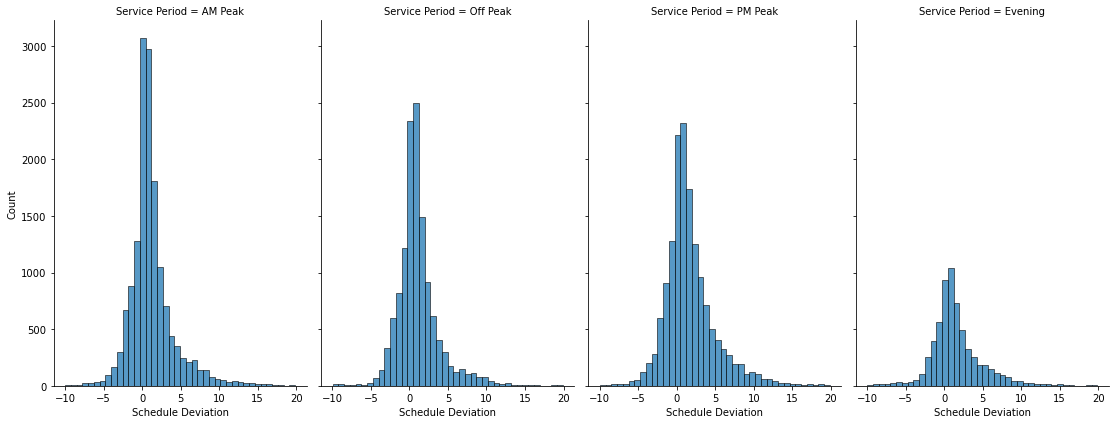

In [32]:
ax = sns.displot(
    df,
    x='Schedule Deviation',
    bins=40,
    col='Service Period',
    col_order=['AM Peak', 'Off Peak', 'PM Peak', 'Evening'],
    height=6,
    aspect=0.65
)

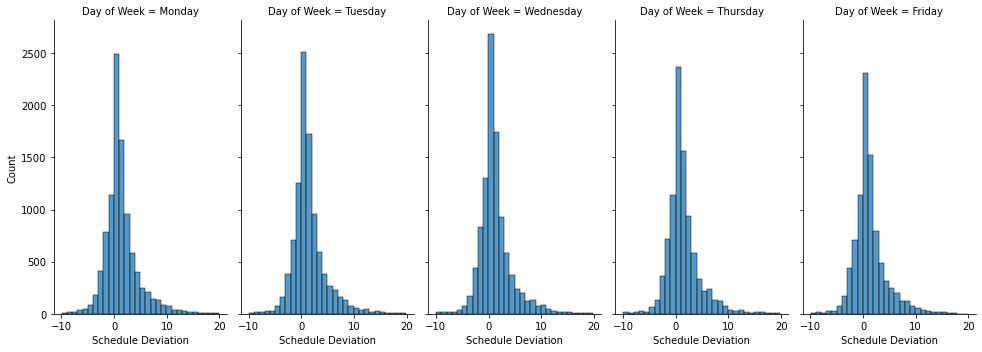

In [33]:
ax = sns.displot(
    df,
    x='Schedule Deviation',
    bins=30,
    col='Day of Week',
    col_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
    height=5,
    aspect=0.55
)

The distributions above all look pretty similar with the exception of Evening service. However, this can be explained by the Evening service period not having as much service as the other service periods. Let's look at how the individual routes have performed.


In [34]:
# get number of records by route
route1 = len(df[df['Route'] == '1 - Winston-Salem Express'])
route2 = len(df[df['Route'] == '2 - Greensboro Express'])
route3 = len(df[df['Route'] == '3 - High Point Express'])
route4 = len(df[df['Route'] == '4 - Alamance-Burlington Express'])
route6 = len(df[df['Route'] == '6 - Surry County Express'])
route9 = len(df[df['Route'] == '9 - Davidson Business 85 Express'])
route10 = len(df[df['Route'] == '10 - Randolph Express'])
route17 = len(df[df['Route'] == '17 - Kernersville Express'])
route20 = len(df[df['Route'] == '20 - NW Pleasant Ridge'])
route21 = len(df[df['Route'] == '21 - NE Chimney Rock'])
route22 = len(df[df['Route'] == '22 - SW Sandy Ridge'])
route23 = len(df[df['Route'] == '23 - SE Piedmont Parkway'])
route24 = len(df[df['Route'] == '24 - Burgess/Regional Rd'])

In [35]:
# breakdown status by route
status_by_route = pd.crosstab(
    index=df['Status'],
    columns=df['Route']
)

status_by_route['Route 1 Per'] = status_by_route['1 - Winston-Salem Express'] / route1
status_by_route['Route 2 Per'] = status_by_route['2 - Greensboro Express'] / route2
status_by_route['Route 3 Per'] = status_by_route['3 - High Point Express'] / route3
status_by_route['Route 4 Per'] = status_by_route['4 - Alamance-Burlington Express'] / route4
status_by_route['Route 6 Per'] = status_by_route['6 - Surry County Express'] / route6
status_by_route['Route 9 Per'] = status_by_route['9 - Davidson Business 85 Express'] / route9
status_by_route['Route 10 Per'] = status_by_route['10 - Randolph Express'] / route10
status_by_route['Route 17 Per'] = status_by_route['17 - Kernersville Express'] / route17
status_by_route['Route 20 Per'] = status_by_route['20 - NW Pleasant Ridge'] / route20
status_by_route['Route 21 Per'] = status_by_route['21 - NE Chimney Rock'] / route21
status_by_route['Route 22 Per'] = status_by_route['22 - SW Sandy Ridge'] / route22
status_by_route['Route 23 Per'] = status_by_route['23 - SE Piedmont Parkway'] / route23
status_by_route['Route 24 Per'] = status_by_route['24 - Burgess/Regional Rd'] / route24

# identify columns to keep
cols = [
    'Route 1 Per', 'Route 2 Per', 'Route 3 Per', 'Route 4 Per', 'Route 6 Per','Route 9 Per',
    'Route 10 Per','Route 17 Per','Route 20 Per', 'Route 21 Per', 'Route 22 Per', 'Route 23 Per',
    'Route 24 Per'
]

# select only columns of interest and transpose the dataframe
status_by_route = status_by_route[cols].transpose()[['On Time', 'Early', 'Late']]

# print out styled dataframe
status_by_route.style.format({
    'On Time': '{:.2%}', 'Early': '{:.2%}', 'Late': '{:.2%}'
})

Status,On Time,Early,Late
Route,,,
Route 1 Per,93.82%,0.74%,5.44%
Route 2 Per,70.44%,0.96%,28.60%
Route 3 Per,89.43%,5.18%,5.39%
Route 4 Per,75.69%,10.58%,13.73%
Route 6 Per,70.44%,21.79%,7.78%
Route 9 Per,64.55%,19.63%,15.83%
Route 10 Per,61.73%,20.10%,18.17%
Route 17 Per,76.00%,22.00%,2.00%
Route 20 Per,53.76%,45.63%,0.61%


We can see that the Urban express routes have mostly great on-time performance, except for Route 2. It appears to be late about 28% of the time. The Rural routes tend to be early quite often. The shuttles 22 and 24 have exceptional on-time performance. Routes 20 and 23 are about 40% early. Let's visualize individual route performance.

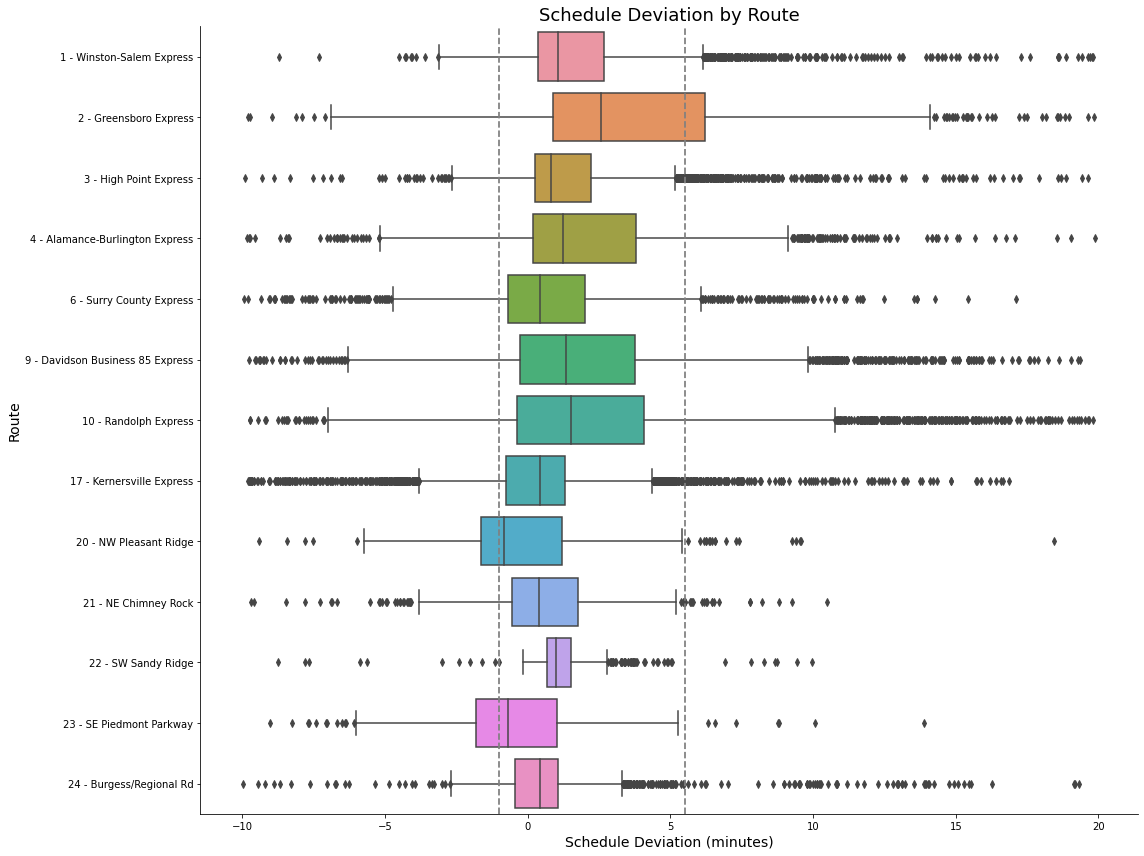

In [36]:
order = [
    '1 - Winston-Salem Express', '2 - Greensboro Express', '3 - High Point Express',
    '4 - Alamance-Burlington Express', '6 - Surry County Express',
    '9 - Davidson Business 85 Express', '10 - Randolph Express', 
    '17 - Kernersville Express', '20 - NW Pleasant Ridge', '21 - NE Chimney Rock',
    '22 - SW Sandy Ridge', '23 - SE Piedmont Parkway', '24 - Burgess/Regional Rd'
]

plt.figure(figsize=(16,12))
ax = sns.boxplot(x='Schedule Deviation', y='Route', data=df, order=order, orient='h')
plt.axvline(-1, 0, 1, color='gray', ls='--', lw=1.75)
plt.axvline(5.5, 0, 1, color='gray', ls='--', lw=1.75)
plt.title('Schedule Deviation by Route', fontsize=18)
plt.xlabel('Schedule Deviation (minutes)',fontsize=14)
plt.ylabel('Route',fontsize=14)
sns.despine()
plt.tight_layout()

The box plot above reveals quite a lot of information about the schedule deviation of each route. The left side of the box plot represents the 25% percentile, the middle line represents the median value, while the right edge of the box represents the 75% percentile. The whiskers extending to the left and right of the box represent the inter-quartile range and the diamond shaped points represent outliers in the data set. The two dashed vertical lines indicate the area that is considered on-time. We can see that the majority of the data falls within the bounds of the two lines.

In [37]:
sch_dev_mean = df.groupby('Route')['Schedule Deviation'].mean().to_frame()
sch_dev_std = df.groupby('Route')['Schedule Deviation'].std().to_frame()

sch_dev_perf = sch_dev_mean.merge(sch_dev_std, on='Route')
sch_dev_perf.rename(columns={
    'Schedule Deviation_x': 'Sch. Dev. Mean',
    'Schedule Deviation_y': 'Sch. Dev. Std'
}, inplace=True)
sch_dev_perf.sort_values('Sch. Dev. Mean', ascending=False).style.format({
    'Sch. Dev. Mean': '{:,.3f}', 'Sch. Dev. Std': '{:,.3f}'
})

,Sch. Dev. Mean,Sch. Dev. Std
Route,,
2 - Greensboro Express,3.652,3.370
10 - Randolph Express,2.300,4.381
4 - Alamance-Burlington Express,2.016,3.211
9 - Davidson Business 85 Express,1.969,4.066
1 - Winston-Salem Express,1.778,2.262
3 - High Point Express,1.459,2.322
22 - SW Sandy Ridge,1.220,1.289
6 - Surry County Express,0.716,3.423
24 - Burgess/Regional Rd,0.542,2.025


In [38]:
late_records = df[df['Status'] == 'Late']

top_10_late = late_records.groupby('Stop Name').size().sort_values(ascending=False)[:10].to_frame()
top_10_late.rename(columns={0: 'Count'}, inplace=True)
top_10_late.style.format({'Count': '{:,}'})

,Count
Stop Name,
Four Seasons Mall,"1,445"
Greensboro Depot,274
Coliseum & Freeman Mill,249
Innovation Quarter (5th & Patterson),235
Coble Transportation Center,229
Gate City Blvd & Glenwood Ave,183
High Point Terminal,174
North Asheboro Park & Ride,153
Randolph Health,137


The table above shows the stops with the highest counts of late records. We can see that Four Seasons Mall has by the far the largest number of late records. Route 2 is the only route to serve this stop. One important note regarding this data, a few of the time points are published early which ensures passengers have enough time to make it to the stop before the bus arrives. Four Seasons Mall is such a stop. For example, one of the published time points for this stop is 6:25 AM. The bus may not arrive until 6:27 AM but by publishing the time as 6:25 AM, passengers will be sure to be at the stop by the time the bus arrives. Innovation Quarter is another example of this type of adjustment but for Route 1. What's interesting is that the mid-route time point for Route 3 is missing from this list which also has its time adjusted. Let's dig into the Four Seasons Mall data.

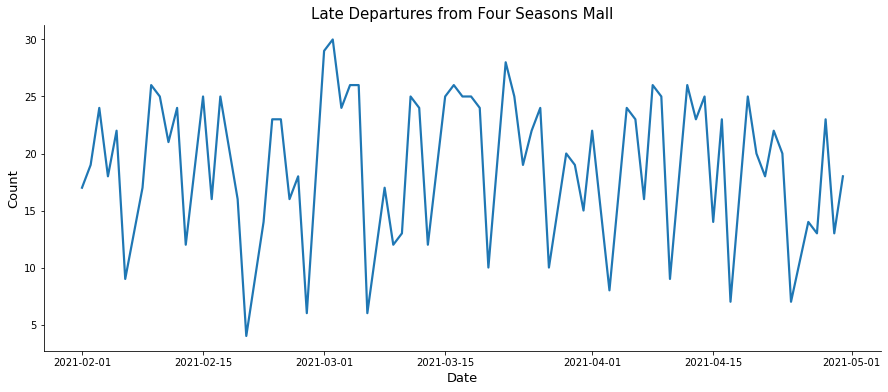

In [39]:
four_seasons_mall_late = late_records[late_records['Stop Name'] == 'Four Seasons Mall']

mall_late_by_date = four_seasons_mall_late.groupby('Date').size()

plt.figure(figsize=(15,6))
ax = sns.lineplot(data=mall_late_by_date, lw=2.2)
plt.xlabel('Date',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.title('Late Departures from Four Seasons Mall', fontsize=15)
sns.despine()
plt.show()

There doesn't appear to be any concentration of late records around a particular day. Let's now check by trip time.

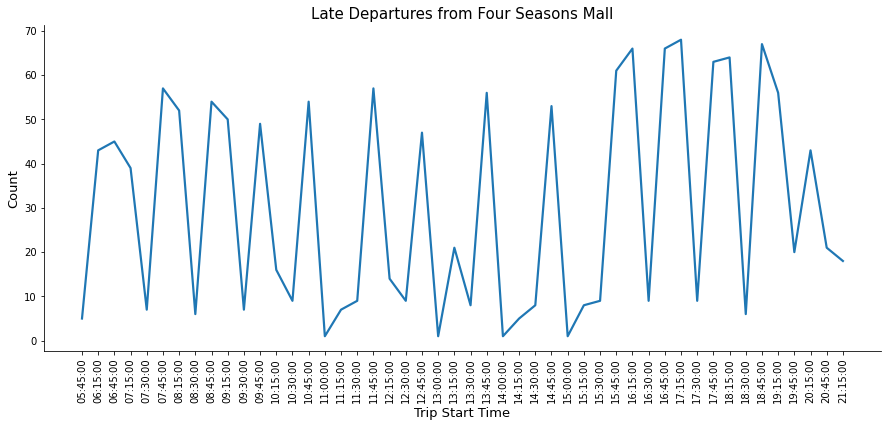

In [40]:
mall_late_by_trip = four_seasons_mall_late.groupby('Trip Start Time').size()
mall_late_by_trip.index.astype('string')

plt.figure(figsize=(15,6))
ax = sns.lineplot(data=mall_late_by_trip, lw=2.2)
plt.xlabel('Trip Start Time',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.title('Late Departures from Four Seasons Mall', fontsize=15)
plt.xticks(rotation = 90)
sns.despine()
plt.show()

This looks like an interesting plot. We see a series of high values followed by a steep drop. There appears to be a more consistent pattern during the AM Peak and PM Peak. Perhaps, the issue lies in a certain direction, for example, eastbound or westbound. Let's dig a little deeper...

In [41]:
mall_late_by_dir = four_seasons_mall_late.groupby('Direction').size()
mall_late_by_dir

Direction
Dir = 0     204
Dir = 1    1241
dtype: int64

On Route 2, Dir=1 equates to an outbound trip, or a trip leaving the Coble Transportation Center and heading east to the Greensboro Depot. Let's check out the distribution of schedule deviation for outbound trips at Four Seasons Mall for Route 2.

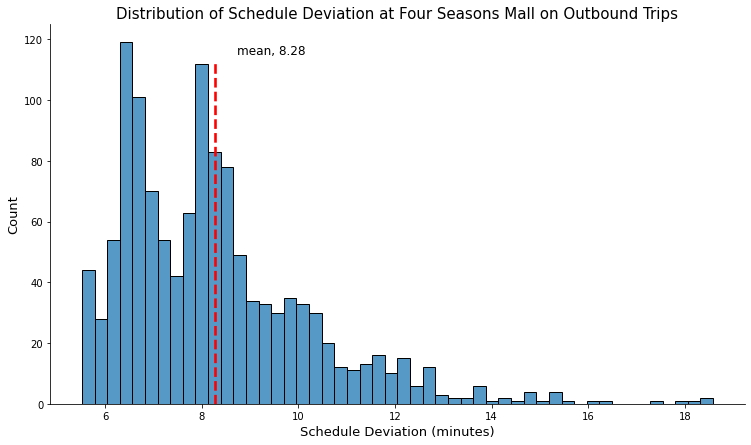

In [42]:
late_fourseasons_outbound = four_seasons_mall_late[four_seasons_mall_late['Direction'] == 'Dir = 1']
mean_outbound = round(late_fourseasons_outbound['Schedule Deviation'].mean(), 2)

# create histogram for schedule deviation
ax = sns.displot(late_fourseasons_outbound, x='Schedule Deviation', bins=50, height=6, aspect=1.75)
plt.axvline(mean_outbound, 0, 0.9, color='red', ls='--', lw=2.6)
plt.text(8.73, 115, 'mean, ' + str(mean_outbound), size='large')
plt.xlabel('Schedule Deviation (minutes)',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.title('Distribution of Schedule Deviation at Four Seasons Mall on Outbound Trips', fontsize=15)
plt.show()

It looks like a pretty heavily skewed distribution and that is causing the mean to be affected. Let me just highlight again that the scheduled time at this stop has been adjusted to ensure passengers are at the stop when the bus arrives. With the majority of observations being between 6 and 8 minutes, I'm not too concerned. If this was an issue, I imagine we would have customers calling about it. Let's check the median value, which is less affected by outliers in the data set.

In [43]:
round(late_fourseasons_outbound['Schedule Deviation'].median(), 2)

8.02

Wow! It's not that far off from the mean value. Maybe the outliers are not intense enough to pull the mean farther to the right. Since this stop is in the middle of the route and the data shows that the outbound trip tends to be late, let's check the start of line for inbound trips to see if they are departing on-time or late.

In [44]:
df[
    (df['Route'] == '2 - Greensboro Express') &
    (df['Direction'] == 'Dir = 0') &
    (df['Time Point Number'] == 0)
]['Status'].value_counts().to_frame()

,Status
On Time,1269
Late,137
Early,14


While there appears to be a large number of outbound trips that are being recorded as late at Four Seasons Mall, the dataframe above shows that about 90% of inbound trips leaving the Greensboro Depot on Route 2 are on-time. 

Looking back in the data, we saw that Route 22 only had 801 observations. Let's dig into this and try and find out what is happening. Was data being collected up until a certain point or has the data collection be scattered through the period?

In [47]:
route22_by_date = df[df['Route'] == '22 - SW Sandy Ridge'].groupby('Date').size()

(<Figure size 1080x144 with 2 Axes>,
 array([<AxesSubplot:ylabel='2021'>], dtype=object))

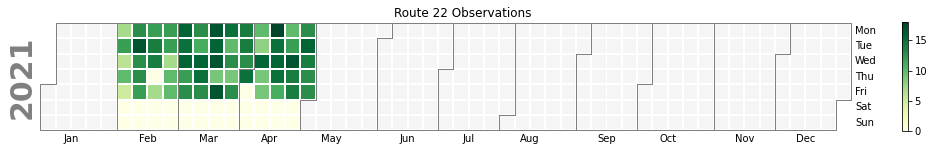

In [122]:
calplot.calplot(route22_by_date, edgecolor='gray', suptitle='Route 22 Observations', cmap='YlGn', figsize=(15,2))

Data seems to be consistent throughout the analysis period. Let's examine one of the other shuttles for comparison. The third Thursday in February was when PART operated on an adjusted schedule due to inclement weather. The first Friday in April is Good Friday when PART did not operate service.

In [51]:
route20_by_date = df[df['Route'] == '20 - NW Pleasant Ridge'].groupby('Date').size()

(<Figure size 1080x144 with 2 Axes>,
 array([<AxesSubplot:ylabel='2021'>], dtype=object))

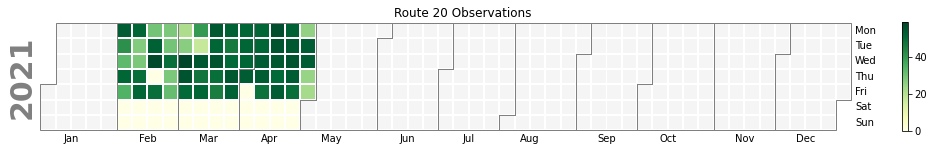

In [123]:
calplot.calplot(route20_by_date, edgecolor='gray', suptitle='Route 20 Observations', cmap='YlGn', figsize=(15,2))

We can see a similar pattern in the data. If we look at the scale bar, we can see that Route 20 has significantly more observations per day than Route 22. 

Back to the question at hand, while sparse, it appears that Route 22 has data for the entire analysis period. Let's try looking at the `Trip Start Time` column and see if only certain trips are being collected.

In [53]:
route22_by_trip = df[df['Route'] == '22 - SW Sandy Ridge'].groupby('Trip Start Time').size().to_frame()
route22_by_trip.rename(columns={0: 'Count'}, inplace=True)

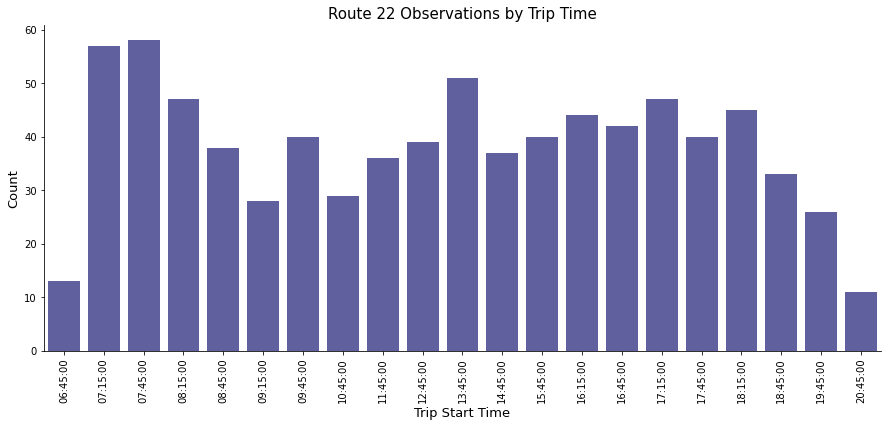

In [54]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=route22_by_trip.index, y='Count', data=route22_by_trip, color='blue', saturation=0.25)
plt.xlabel('Trip Start Time',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.title('Route 22 Observations by Trip Time', fontsize=15)
plt.xticks(rotation = 90)
sns.despine()
plt.show()

It appears that some trips are being collected more than others. For example, the 9:15 AM and the 10:45 AM trips both have fewer observations than other trips. The 6:45 AM trip is a demand-response trip so those counts may indicate how many times that service is being utilized. 

Let's see what stops on Route 22 are being collected.

In [68]:
route22_by_stop = df[df['Route'] == '22 - SW Sandy Ridge'].groupby('Stop Name').size().to_frame()
route22_by_stop.rename(columns={0: 'Count'}, inplace=True)
route22_by_stop[route22_by_stop['Count'] > 0]

,Count
Stop Name,
Coble Transportation Center,799
PIEDMONTTRIADPK,2


It appears that Route 22 on-time performance is only being collected at the Coble Transportation Center and at Piedmont Triad Parkway. Piedmont Triad Parkway is not a time point along Route 22. This data has been shared with our APC vendor in the hopes of identifying the issue that is causing the gaps in data collection.

Let's dig into Route 9. There were some interesting data points when looking at it in the Pivot Charts in Excel. Specifically, the 3:30 PM southbound trip leaving from the Greensboro Depot.

In [71]:
route9_1530_trips = df[
    (df['Route'] == '9 - Davidson Business 85 Express') &
    (df['Direction'] == 'Dir = 1') &
    (df['Time Point Number'] == 0) &
    (pd.to_datetime(df['Trip Start Time'], format='%H:%M:%S') == pd.to_datetime('15:30:00', format='%H:%M:%S'))
]

In [76]:
route9_1530_otp_performance = route9_1530_trips.groupby('Status').size().sort_values().to_frame()
route9_1530_otp_performance.rename(columns={0: 'Count'}, inplace=True)
route9_1530_otp_performance['Percentage'] = route9_1530_otp_performance['Count'] / len(route9_1530_trips)
route9_1530_otp_performance.style.format({'Count': '{:,}', 'Percentage': '{:.2%}'})

,Count,Percentage
Status,,
Late,19,33.93%
On Time,37,66.07%


The table above shows the performance leaving the Greensboro Depot on the 3:30 PM trip. This trip on Route 9 is the first run of Block 903. This is interesting. Why is the bus late 34% of the time when this is the first trip of the block? Let's dig into the performance of this trip at the start-of-line.

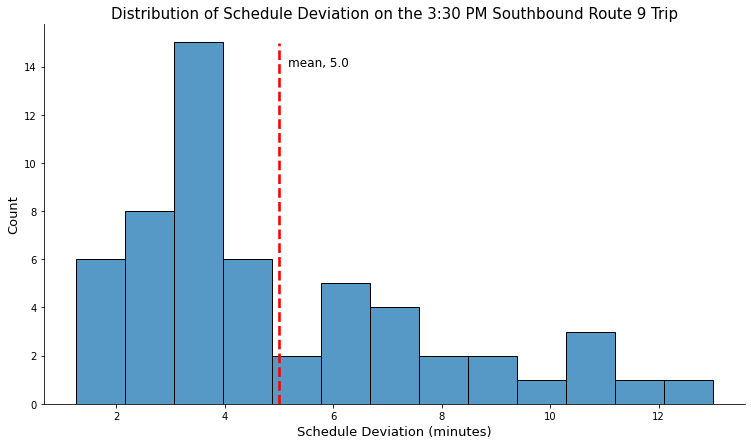

In [91]:
mean9_1530 = round(route9_1530_trips['Schedule Deviation'].mean(), 2)

# create histogram for schedule deviation
ax = sns.displot(route9_1530_trips, x='Schedule Deviation', bins=13, height=6, aspect=1.75)
plt.axvline(mean9_1530, 0, 0.95, color='red', ls='--', lw=2.6)
plt.text(5.17, 14, 'mean, ' + str(mean9_1530), size='large')
plt.xlabel('Schedule Deviation (minutes)',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.title('Distribution of Schedule Deviation on the 3:30 PM Southbound Route 9 Trip', fontsize=15)
plt.show()

We can see that most of the trips are between 2 and 5 minutes behind schedule which is not considered 'late'. However, there are a number of trips that are more than 6 minutes late. Let's select a few of the worst performing trips and utilize TransLoc Instant Replay in the hopes of understanding what is causing the bus to fall behind schedule on its very first trip.

In [99]:
route9_1530_trips.loc[
    route9_1530_trips['Schedule Deviation'] > 7,
]['Date']

29774   2021-03-03
29790   2021-03-26
30081   2021-04-05
30083   2021-04-07
30086   2021-04-13
30090   2021-04-19
30092   2021-04-21
30093   2021-04-22
30094   2021-04-23
30096   2021-04-28
30097   2021-04-29
Name: Date, dtype: datetime64[ns]

The list above are all the days where the 3:30 PM southbound trip on Route 9 is more than 7 minutes late at the start-of-line. Thinking back, we know the data set begins in February and goes through the end of April. We do not see any records for February and only two for March. However, we can see several days in April where the trip starts late. Is there a new driver on this route or is the traffic significantly worse? Are there passenger issues? We can use the Transit Alert Data to try and understand what is causing the delayed start.

In [104]:
from arcgis.gis import GIS
import os

In [105]:
# sign into ArcGIS Online
username = os.environ.get('ArcGIS Username')
password = os.environ.get('AGOL Password')

gis = GIS('https://www.arcgis.com', username, password)

In [106]:
# grab content
alert_content = gis.content.get('40dd0ecac4af411684e8c66cd5930ccb')

# get layer
alert_layer = alert_content.layers[0]

# convert layers to spatial dataframes
alert_df = pd.DataFrame.spatial.from_layer(alert_layer)

In [107]:
alert_df.tail()

,CreationDate,Creator,EditDate,Editor,SHAPE,additional_comments,date_time,delay_length,delay_reason,details,globalid,indicate_who_completed_the_surv,objectid,routes,status_of_bus,time_of_submission,total_north_shuttle,total_route_1,total_route_10,total_route_10_NORTH,total_route_10_SOUTH,total_route_17,total_route_17_EAST,total_route_17_WEST,total_route_19,total_route_1_EAST,total_route_1_WEST,total_route_2,total_route_20,total_route_21,total_route_22,total_route_23,total_route_24,total_route_27,total_route_28,total_route_28_EAST,total_route_28_WEST,total_route_2_EAST,total_route_2_WEST,total_route_3,total_route_3_NORTH,total_route_3_SOUTH,total_route_4,total_route_4_EAST,total_route_4_WEST,total_route_5,total_route_5_EAST,total_route_5_WEST,total_route_6,total_route_6_NORTH,total_route_6_SOUTH,total_route_9,total_route_9_NORTH,total_route_9_SOUTH,total_south_shuttle,trip_start_time
17583,2021-05-04 13:47:15.319000006,,2021-05-04 13:47:15.319000006,,"{""x"": 0, ""y"": 0, ""spatialReference"": {""wkid"": ...",None,NaT,0_5_minutes,hold_for_connections,None,6668b12e-753c-4c1e-8dca-0b2b13d305cf,cassandra,17605,"route_1_WEST,route_2_EAST,route_3_SOUTH,route_...",minor_delay_less_than_10_minute,2021-05-04 13:47:15.082000017,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,09:45
17584,2021-05-04 14:18:40.385999918,,2021-05-04 14:18:40.385999918,,"{""x"": 0, ""y"": 0, ""spatialReference"": {""wkid"": ...",None,NaT,None,None,None,4450c974-0378-4aaf-8e06-75139db63aba,sonya,17606,"route_1_EAST,route_2_WEST,route_3_NORTH,route_...",on_time,2021-05-04 14:18:40.081000090,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10:15
17585,2021-05-04 14:52:26.030999899,,2021-05-04 14:52:26.030999899,,"{""x"": 0, ""y"": 0, ""spatialReference"": {""wkid"": ...",None,NaT,None,None,None,bff2b90b-a723-4199-8ee1-f1315589cc07,sonya,17607,"route_1_WEST,route_2_EAST,route_3_SOUTH,route_...",on_time,2021-05-04 14:52:25.723000050,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,10:45
17586,2021-05-04 15:30:05.111999989,,2021-05-04 15:30:05.111999989,,"{""x"": 0, ""y"": 0, ""spatialReference"": {""wkid"": ...",None,NaT,None,None,None,862b65fc-bf66-4c4a-88af-eb869d9b4745,sonya,17608,"route_1_EAST,route_2_WEST,route_3_NORTH,route_...",on_time,2021-05-04 15:30:04.813999891,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11:15
17587,2021-05-04 15:46:15.400000095,,2021-05-04 15:46:15.400000095,,"{""x"": 0, ""y"": 0, ""spatialReference"": {""wkid"": ...",None,NaT,None,None,None,c380e016-8d67-4450-8c20-805b6a69ea55,sonya,17609,"route_1_WEST,route_2_EAST,route_3_SOUTH,route_...",on_time,2021-05-04 15:46:15.210000038,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11:45


Now we have our alert data. We can filter for our Spring Season time frame and for any records related to Route 9 3:30 PM southbound trip.

In [115]:
# convert to eastern timezone
alert_df['time_of_submission'] = alert_df['time_of_submission'].dt.tz_localize('utc').dt.tz_convert('US/Eastern')

alert_df[
    (alert_df['time_of_submission'].between('2021-02-01', '2021-04-30')) &
    (alert_df['routes'].str.contains('route_9_SOUTH')) &
    (alert_df['trip_start_time'] == '15:30')
][['time_of_submission', 'trip_start_time', 'routes', 'status_of_bus']]

,time_of_submission,trip_start_time,routes,status_of_bus
16746,2021-04-08 15:38:37.845000029-04:00,15:30,"route_9_SOUTH,route_10_NORTH",on_time
16989,2021-04-15 15:36:59.553999901-04:00,15:30,"route_9_SOUTH,route_10_NORTH,route_10_SOUTH",on_time


It appears that there are only two records that match our criteria and both are recorded as being on time. Let's check TransLoc Instant Replay.

TransLoc shows Route 9 leave the CTC on April 8 and April 15 at 3:10 PM. The bus needs to be pulling out of the Greensboro Depot at 3:30 PM. We know from the data above, that on these two days, Route 9 departed late. Let's find a day when this trip departed on time and use TransLoc to see when that bus left the CTC.

In [128]:
route9_1530_trips.loc[
    route9_1530_trips['Schedule Deviation'] < 2
]['Date'].sample(5)

29519   2021-02-01
29773   2021-03-02
29781   2021-03-12
29780   2021-03-11
29778   2021-03-09
Name: Date, dtype: datetime64[ns]

The list above shows five days where the 3:30 PM Route 9 trip is on time.

After looking at TransLoc, it seems that 3:10 PM is when the bus for this trip pulls out. Looking at the APC data, some days it makes it there on time and others, it is late. It is also a challenge because Route 10 has a 3:25 PM pull out from the Greensboro Depot.

### Conclusion

Looking back, we can see that PART Express has an overall system on-time performance of approximately 76%. Let us keep in mind that a few of the time points are adjusted to ensure that passengers arrive to the bus stop with enough time. When we consider that factor and review the data presented above, we can be confident that the on-time performance is likely higher than the 76%. It also appears that we discovered some inconsistencies and irregularities in the data. This will need to be addressed with the APC vendor.